In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
dir_datasets = '/content/drive/MyDrive/DataScience/Data Science Course/0.Datasets/{}'
df_population_raw = pd.read_csv(dir_datasets.format('population_total.csv'), encoding='latin-1')

In [4]:
df_population_raw.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


In [5]:
# remove nulls values 
df_population_raw.dropna(inplace = True)

In [6]:
df_population_raw.dtypes

country        object
year          float64
population    float64
dtype: object

In [7]:
df_population_raw['year'] = df_population_raw['year'].astype('int64')

In [8]:
# create a pivot table
df_pivot = df_population_raw.pivot(index='year', 
                              columns='country', 
                              values='population')

In [9]:
# select some countries
df_pivot = df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

# **BARPLOT**

In [10]:
# select only 2020 year
df_pivot.index

Int64Index([1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
            2010, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')

In [18]:
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [19]:
df_pivot_2020.T

year,2020
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


In [20]:
# change from columns to rows
df_pivot_2020 = df_pivot_2020.T

<AxesSubplot:title={'center':'Population in 2020'}, xlabel='COUNTRIES', ylabel='POPULATION'>

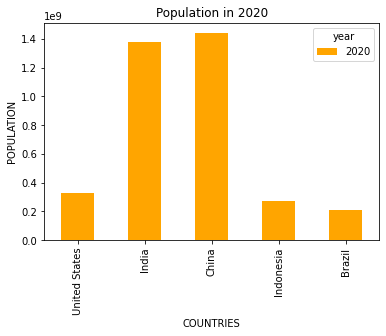

In [23]:
df_pivot_2020.plot(kind='bar', 
                   color='orange', 
                   xlabel='COUNTRIES', 
                   ylabel='POPULATION', 
                   title='Population in 2020')

### **BARPLOT GROUPING BY N VARIABLES**

In [25]:
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]
df_pivot_sample

country,United States,India,China,Indonesia,Brazil
year,,,,,
1980,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1990,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
2000,281710909.0,1.056576e+09,1.290551e+09,211513823.0,174790340.0
2010,309011475.0,1.234281e+09,1.368811e+09,241834215.0,195713635.0
2020,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


<AxesSubplot:title={'center':'Population in 2020'}, xlabel='COUNTRIES', ylabel='POPULATION'>

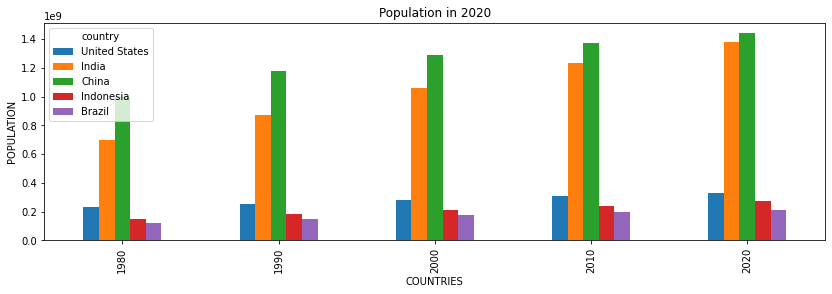

In [30]:
df_pivot_sample.plot(kind='bar',
                     xlabel='COUNTRIES', 
                     ylabel='POPULATION', 
                     title='Population in 2020',
                     figsize=(14, 4))